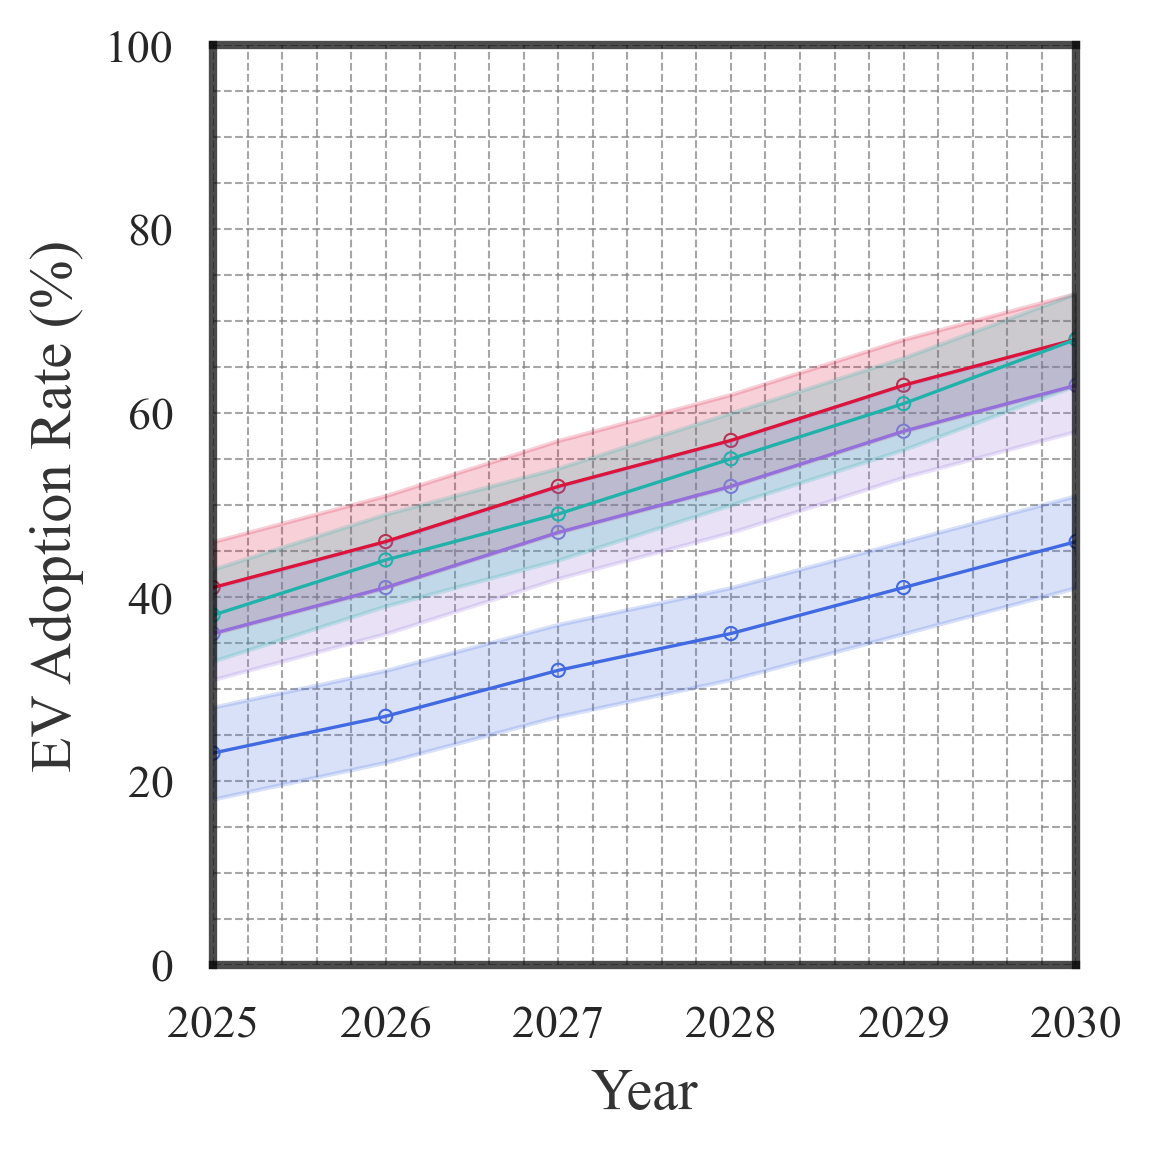

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the Excel file
file_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\EV\EV_Adoption_Projections.xlsx'
df = pd.read_excel(file_path)
# Define the output path for saving the graphs
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'
# Filter the DataFrame for years 2025 to 2030
df = df[(df['Year'] >= 2025) & (df['Year'] <= 2030)]

# Define years and states
years = df['Year']

# Define states and their corresponding columns
states = {
    'California': {
        'average': 'California Average',
        'lower': 'California Lower Bound',
        'upper': 'California Upper Bound'
    },
    'Georgia': {
        'average': 'Georgia Average',
        'lower': 'Georgia Lower Bound',
        'upper': 'Georgia Upper Bound'
    },
    'New York': {
        'average': 'New York Average',
        'lower': 'New York Lower Bound',
        'upper': 'New York Upper Bound'
    },
    'Washington': {
        'average': 'Washington Average',
        'lower': 'Washington Lower Bound',
        'upper': 'Washington Upper Bound'
    }
}

# Define colors using HUSL palette
colors = ['crimson', 'royalblue', 'mediumpurple', 'lightseagreen']

# Set the plot style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Create the plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

for state, color in zip(states.keys(), colors):
    info = states[state]
    ax.scatter(years, df[info['average']], color=color, marker='o', facecolors='none', edgecolors=color, linewidth=0.5, s=10)
    ax.plot(years, df[info['average']], color=color, linewidth=0.8)
    ax.fill_between(years, df[info['lower']], df[info['upper']], color=color, alpha=0.2)

# Labels and title
ax.set_xlabel('Year', labelpad=5, fontsize=14, color='black', alpha=0.8)
ax.set_ylabel('EV Adoption Rate (%)', labelpad=5, fontsize=14, color='black', alpha=0.8)
#ax.set_title('Projected Yearly Increase in EV Adoption Rates\n with Bounds (2025-2030)', pad=10, fontsize=14, color='black', alpha=0.8)

# Set y-axis limit to 100
ax.set_ylim([0, 100])

# Set x-axis to display only years from 2025 to 2030
ax.set_xlim([2025, 2030])

plt.grid(True)

# Create custom legend handles
legend_handles = []
for state, color in zip(states.keys(), colors):
    legend_handles.append(Line2D([0], [0], color=color, marker='o', markersize=4, label=f'{state} Average', linestyle='-', linewidth=1))

# Add custom legend in the upper right corner
# ax.legend(handles=legend_handles, fontsize=8, loc='upper right')

# Grid and legend
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.7)
    spine.set_linewidth(2)
    
plt.savefig(f'{output_path}/3.svg', format='svg')
# Show the plot
plt.show()


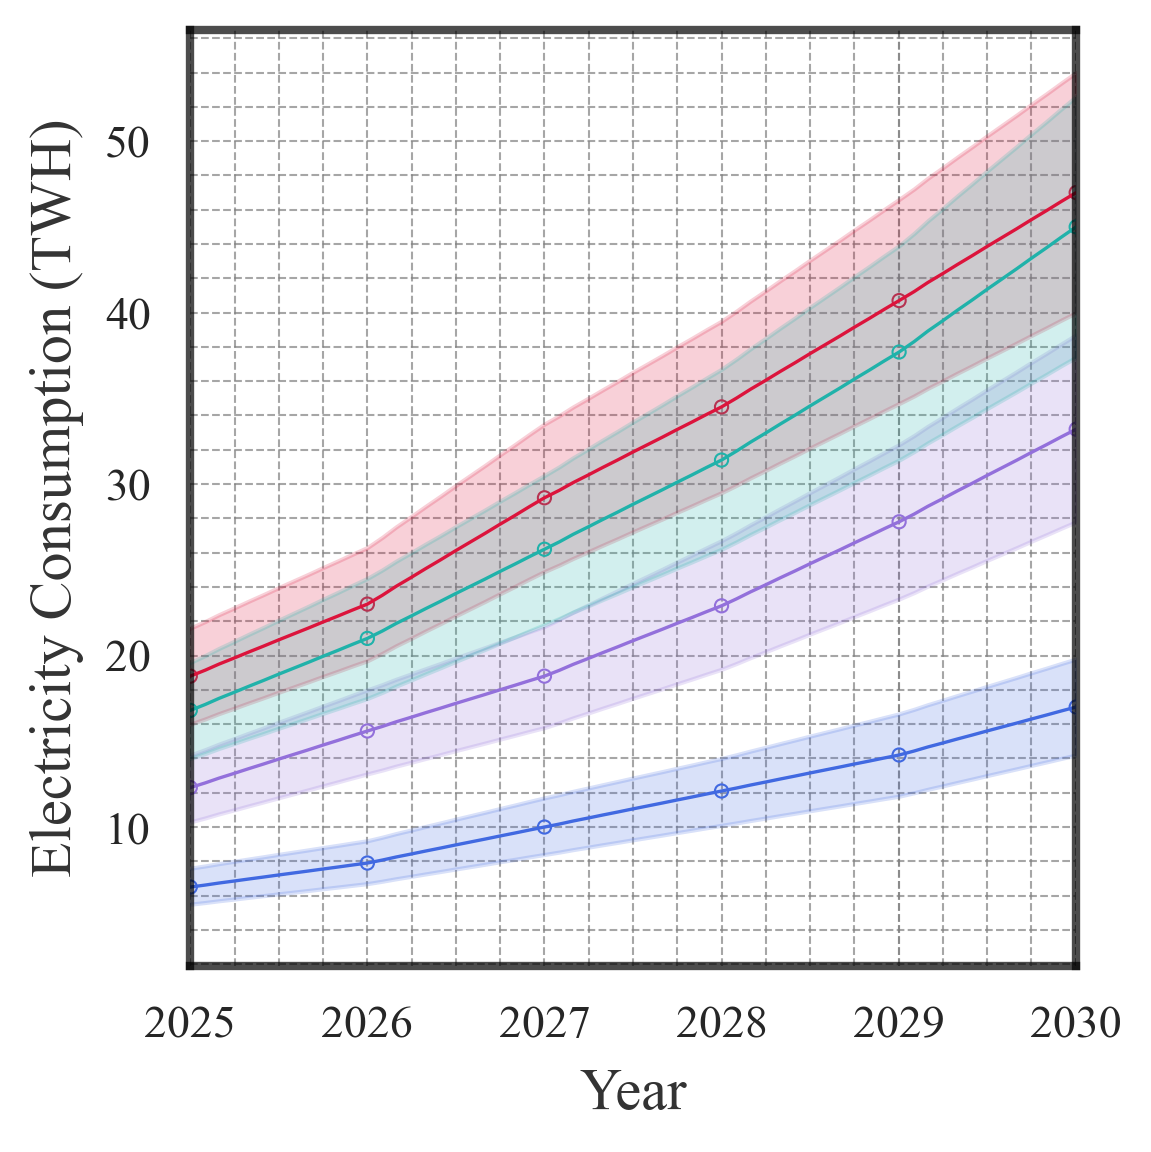

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.dates as mdates

# Load the Excel file
file_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\EV\EV_Electricity_Consumption_Projections.xlsx'
df = pd.read_excel(file_path)
# Define the output path for saving the graphs
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'

# Convert 'Month-Year' to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Define months and states
months = df['Month']

# Define states and their corresponding columns
states = {
    'California': {
        'average': 'California Average',
        'lower': 'California Lower Bound',
        'upper': 'California Upper Bound'
    },
    'Georgia': {
        'average': 'Georgia Average',
        'lower': 'Georgia Lower Bound',
        'upper': 'Georgia Upper Bound'
    },
    'New York': {
        'average': 'New York Average',
        'lower': 'New York Lower Bound',
        'upper': 'New York Upper Bound'
    },
    'Washington': {
        'average': 'Washington Average',
        'lower': 'Washington Lower Bound',
        'upper': 'Washington Upper Bound'
    }
}

# Define colors using HUSL palette
colors = ['crimson', 'royalblue', 'mediumpurple', 'lightseagreen']

# Set the plot style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Create the plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

# Filter data for the first month of each year
scatter_points = df[df['Month'].dt.month == 1]

for state, color in zip(states.keys(), colors):
    info = states[state]
    ax.scatter(scatter_points['Month'], scatter_points[info['average']], marker='o', facecolors='none', edgecolors=color, linewidth=0.5, s=10)
    ax.plot(months, df[info['average']], color=color, linewidth=0.8)
    ax.fill_between(months, df[info['lower']], df[info['upper']], color=color, alpha=0.2)

# Labels and title
ax.set_xlabel('Year', labelpad=5, fontsize=14, color='black', alpha=0.8)
ax.set_ylabel('Electricity Consumption (TWH)', labelpad=5, fontsize=14, color='black', alpha=0.8)
#ax.set_title('Projected Monthly Increase in Electricity Consumption\n for EVs with Bounds (2025-2030)', pad=10, fontsize=14, color='black', alpha=0.8)

# Format x-axis to show only years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ensure 2025 and 2030 are included in the x-axis labels
start_date = pd.Timestamp('2025-01-01')
end_date = pd.Timestamp('2030-01-01')
xticks = pd.date_range(start=start_date, end=end_date, freq='YS').tolist()

if start_date not in xticks:
    xticks.insert(0, start_date)
if end_date not in xticks:
    xticks.append(end_date)

ax.set_xticks(xticks)

# Set x-axis limits to show data from 2025 to 2030
ax.set_xlim([start_date, end_date])

plt.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Grid and legend
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.7)
    spine.set_linewidth(2)
plt.savefig(f'{output_path}/4.svg', format='svg')
# Show the plot
plt.show()


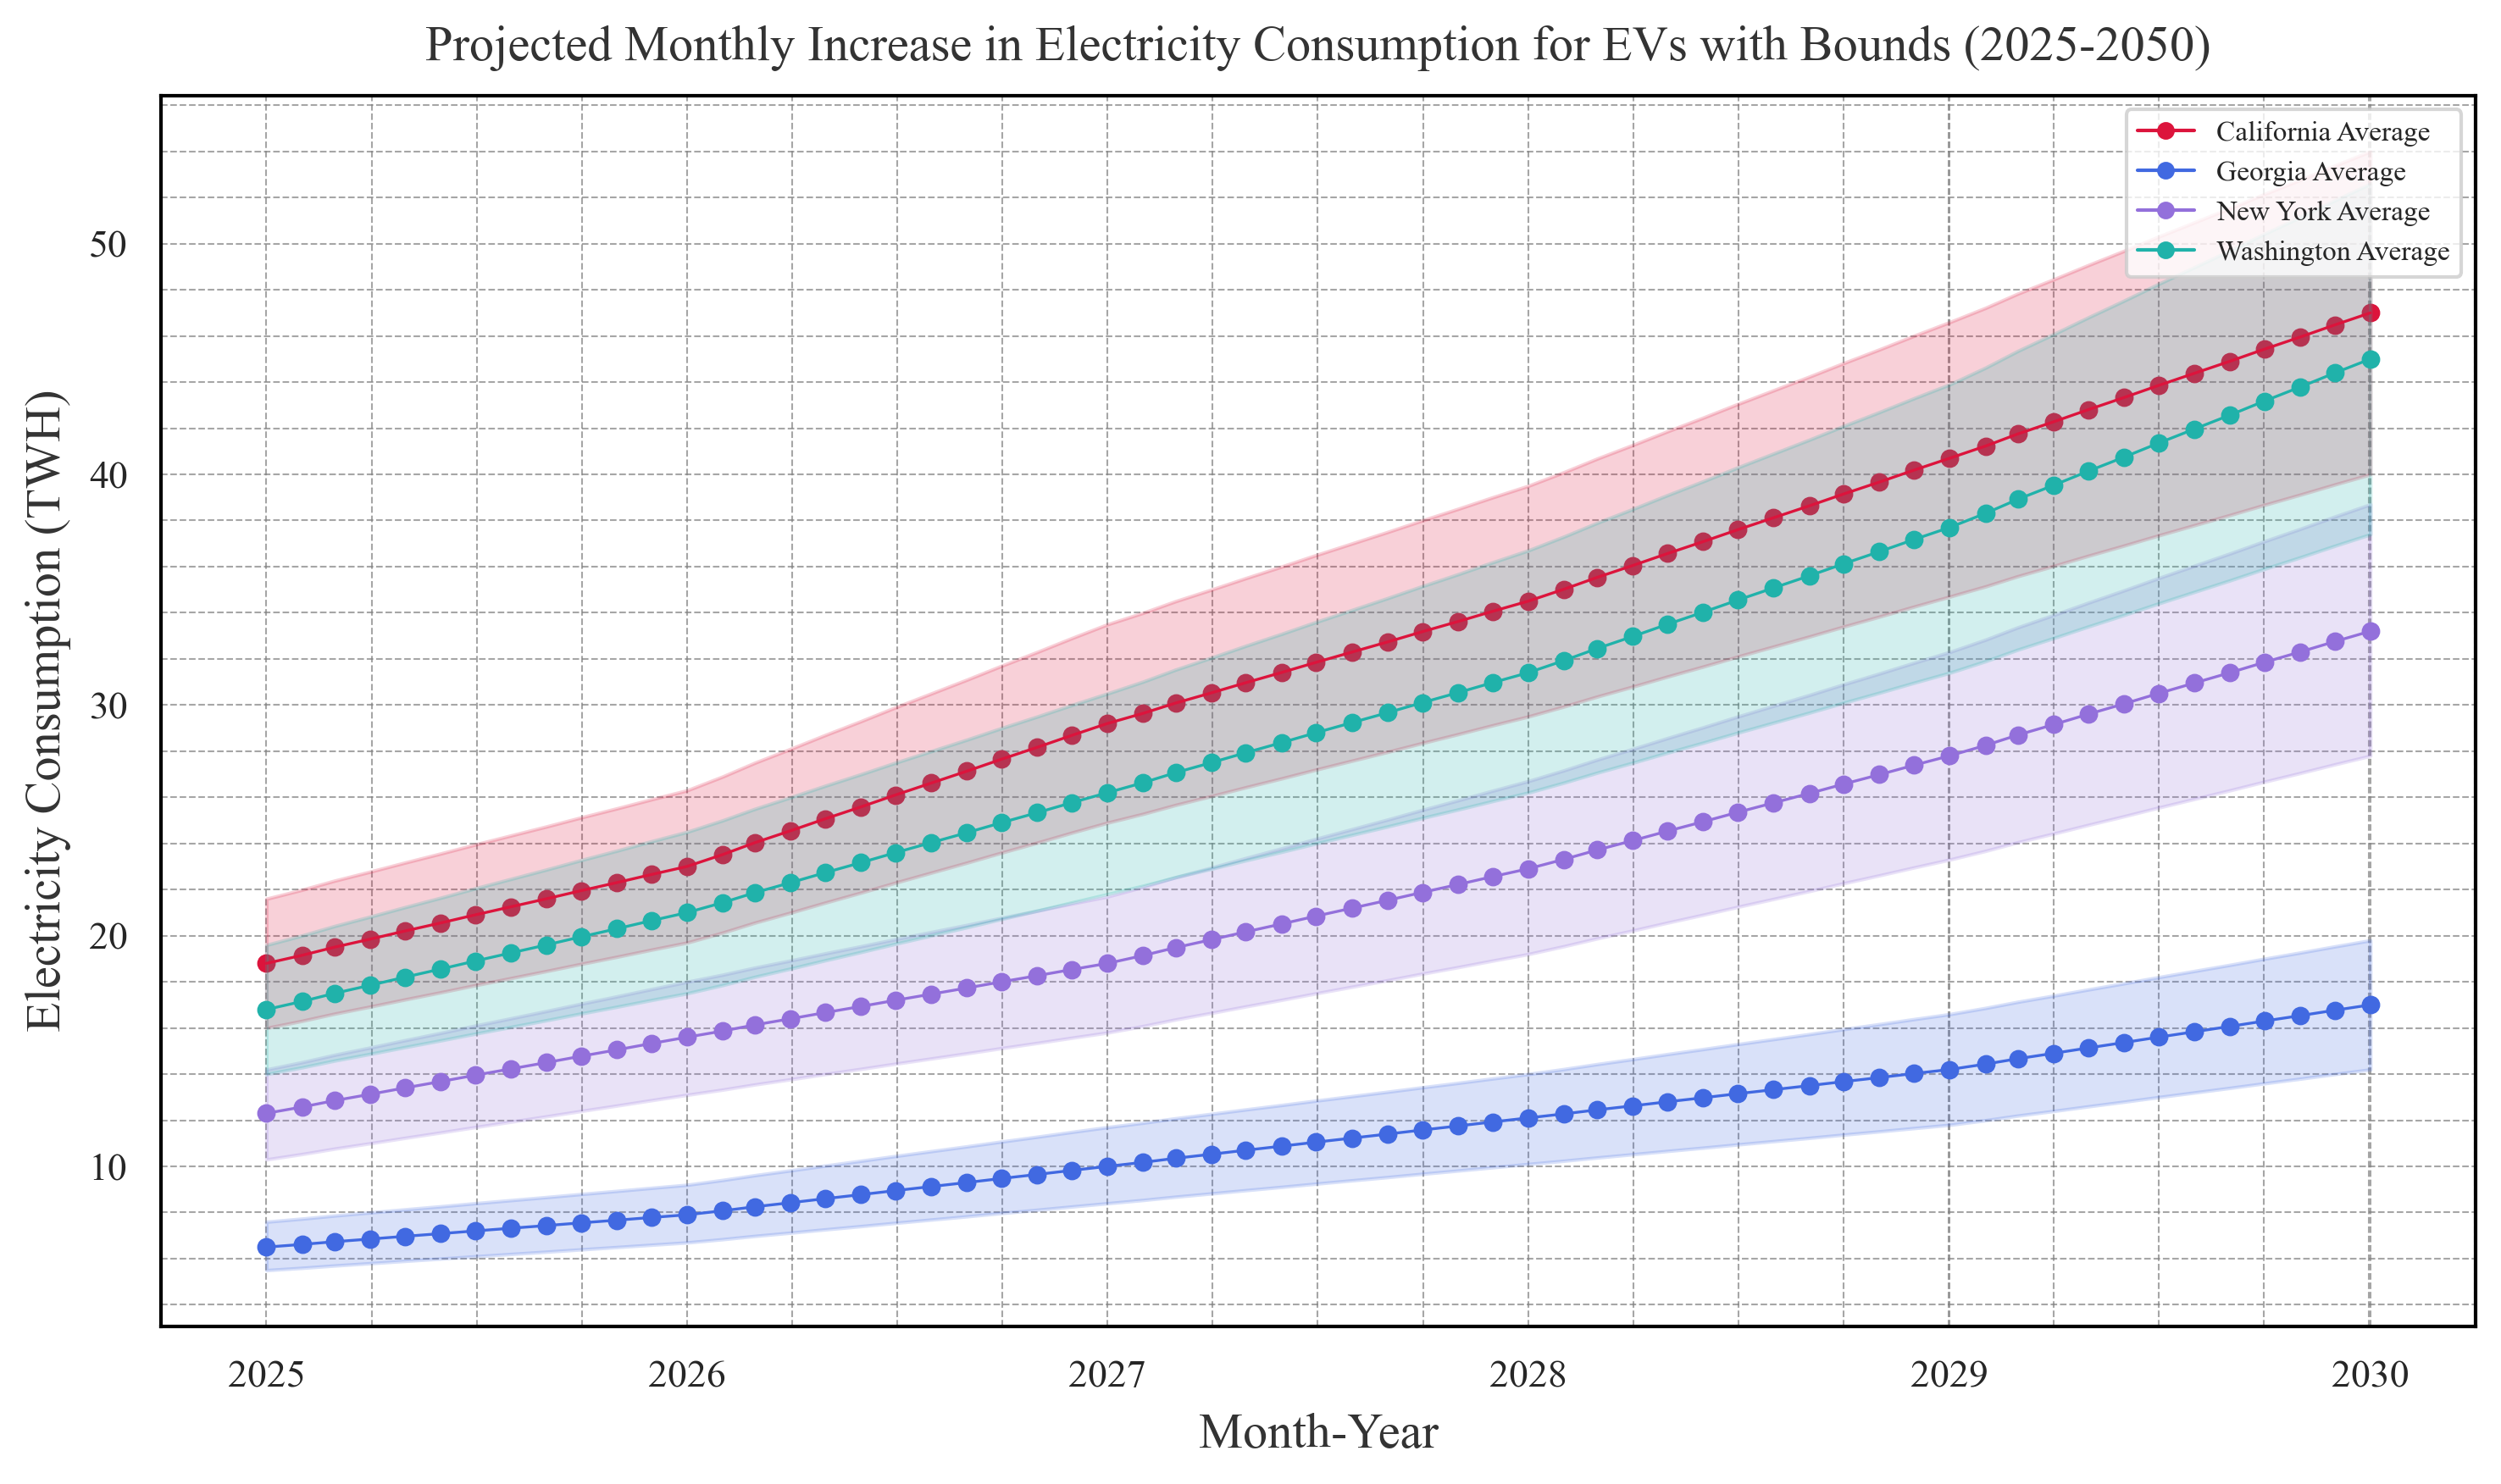

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.dates as mdates

# Load the Excel file
file_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\EV\EV_Electricity_Consumption_Projections.xlsx'
df = pd.read_excel(file_path)

# Convert 'Month-Year' to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Filter the DataFrame for years 2025 to 2050
df = df[(df['Month'].dt.year >= 2025) & (df['Month'].dt.year <= 2030)]

# Define months and states
months = df['Month']

# Define states and their corresponding columns
states = {
    'California': {
        'average': 'California Average',
        'lower': 'California Lower Bound',
        'upper': 'California Upper Bound'
    },
    'Georgia': {
        'average': 'Georgia Average',
        'lower': 'Georgia Lower Bound',
        'upper': 'Georgia Upper Bound'
    },
    'New York': {
        'average': 'New York Average',
        'lower': 'New York Lower Bound',
        'upper': 'New York Upper Bound'
    },
    'Washington': {
        'average': 'Washington Average',
        'lower': 'Washington Lower Bound',
        'upper': 'Washington Upper Bound'
    }
}

# Define colors using HUSL palette
colors = ['crimson', 'royalblue', 'mediumpurple', 'lightseagreen']

# Set the plot style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for state, color in zip(states.keys(), colors):
    info = states[state]
    ax.scatter(months, df[info['average']], color=color, s=18)
    ax.plot(months, df[info['average']], color=color, linewidth=0.8)
    ax.fill_between(months, df[info['lower']], df[info['upper']], color=color, alpha=0.2)

# Labels and title
ax.set_xlabel('Month-Year', labelpad=5, fontsize=14, color='black', alpha=0.8)
ax.set_ylabel('Electricity Consumption (TWH)', labelpad=5, fontsize=14, color='black', alpha=0.8)
ax.set_title('Projected Monthly Increase in Electricity Consumption for EVs with Bounds (2025-2050)', pad=10, fontsize=14, color='black', alpha=0.8)

# Format x-axis to show only years
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ensure 2025 and 2050 are included in the x-axis labels
start_date = pd.Timestamp('2025-01-01')
end_date = pd.Timestamp('2030-01-01')
xticks = pd.date_range(start=start_date, end=end_date, freq='YS').tolist()

if start_date not in xticks:
    xticks.insert(0, start_date)
if end_date not in xticks:
    xticks.append(end_date)

ax.set_xticks(xticks)

plt.grid(True)

# Create custom legend handles
legend_handles = []
for state, color in zip(states.keys(), colors):
    legend_handles.append(Line2D([0], [0], color=color, marker='o', markersize=4, label=f'{state} Average', linestyle='-', linewidth=1))

# Add custom legend in the upper right corner
ax.legend(handles=legend_handles, fontsize=8, loc='upper right')

# Adjust layout to prevent overlapping
plt.tight_layout()
# Grid and legend
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Show the plot
plt.show()
